#### This notebook includes Exchange Data Processing, Labeling, and Baseline Model Setup

In [153]:
import pandas as pd
import numpy as np
# Data preprocessing:
exchange_rate = pd.read_csv('/Users/hetianbai/Desktop/DS-GA 1003/1003 Project/Ab_Return.csv', header=0)

This is the original exchange rate dataset: 

In [158]:
exchange_rate.head()

,date,exalus,exbzus,excaus,exchus,exdnus,exhkus,exinus,exjpus,exkous,...,exsius,exsfus,exslus,exsdus,exszus,extaus,exthus,exukus,exvzus,exeuus
0,1/25/00,0.010634,0.008480,0.006829,0.000036,0.002607,0.000030,0.000390,0.005654,0.002255,...,0.002494,0.005560,0.002607,0.002929,0.001052,0.000583,0.004744,0.013854,0.000560,0.002491
1,1/26/00,0.006313,0.007352,0.007667,0.000077,0.000754,0.000076,0.000879,0.008233,0.001464,...,0.006656,0.004475,0.001396,0.002903,0.001119,0.000130,0.000400,0.008953,0.000051,0.000434
2,1/27/00,0.014630,0.006756,0.009744,0.000054,0.010504,0.000059,0.000306,0.019527,0.004187,...,0.004384,0.002895,0.001646,0.006294,0.013449,0.000670,0.000720,0.007595,0.000509,0.010706
3,1/28/00,0.030380,0.000481,0.000610,0.000068,0.021596,0.000020,0.000680,0.000109,0.007669,...,0.013812,0.023229,0.004176,0.029780,0.022638,0.003311,0.003616,0.001250,0.000966,0.022522
4,1/31/00,0.009330,0.008447,0.002124,0.000109,0.023011,0.000096,0.000604,0.000193,0.004587,...,0.007441,0.014473,0.001867,0.028488,0.022343,0.002287,0.000329,0.002466,0.000051,0.022484


In [154]:
exchange_rate.describe() # first take a look at the exchange data

,exalus,exbzus,excaus,exchus,exdnus,exhkus,exinus,exjpus,exkous,exmaus,...,exsius,exsfus,exslus,exsdus,exszus,extaus,exthus,exukus,exvzus,exeuus
count,2737.000000,2737.000000,2737.000000,2737.000000,2737.000000,2.737000e+03,2737.000000,2737.000000,2737.000000,2.737000e+03,...,2737.000000,2737.000000,2.737000e+03,2737.000000,2737.000000,2737.000000,2.737000e+03,2737.000000,2.737000e+03,2737.000000
mean,0.010348,0.011564,0.007583,0.000543,0.008354,2.635022e-04,0.004281,0.008195,0.007843,2.309232e-03,...,0.003953,0.013523,2.596746e-03,0.009761,0.008698,0.003272,4.628642e-03,0.007870,8.189121e-03,0.008344
std,0.009782,0.012206,0.007364,0.001080,0.006991,4.174457e-04,0.019640,0.006611,0.009908,3.754368e-03,...,0.003308,0.012876,4.386743e-03,0.008510,0.007013,0.003184,4.919769e-03,0.006627,5.001752e-02,0.006959
min,0.000002,0.000008,0.000020,0.000000,0.000003,1.140000e-16,0.000000,0.000008,0.000003,4.670000e-16,...,0.000010,0.000017,2.950000e-16,0.000005,0.000002,0.000000,1.780000e-16,0.000010,0.000000e+00,0.000004
25%,0.003662,0.003764,0.002901,0.000016,0.003215,3.250000e-05,0.000764,0.003034,0.002302,4.670000e-16,...,0.001533,0.004700,4.534880e-04,0.003564,0.003331,0.000995,1.601773e-03,0.003077,6.210000e-16,0.003180
50%,0.008034,0.008214,0.005683,0.000073,0.006846,1.028040e-04,0.002158,0.006984,0.005027,6.670000e-05,...,0.003199,0.010458,1.144812e-03,0.007768,0.007279,0.002337,3.362152e-03,0.006520,6.210000e-16,0.006809
75%,0.014075,0.014920,0.010020,0.000547,0.011860,3.447460e-04,0.005337,0.011827,0.009577,3.380438e-03,...,0.005497,0.018497,2.813449e-03,0.013641,0.012420,0.004542,5.982559e-03,0.011055,5.218460e-04,0.011839
max,0.112252,0.163387,0.083418,0.010371,0.064983,5.907682e-03,1.000000,0.066838,0.114808,3.105419e-02,...,0.031506,0.176884,7.701216e-02,0.074007,0.072921,0.031330,5.820443e-02,0.061708,1.000000e+00,0.065063


Labeling: To degine abnormal change in exchange rate, we take the top 10% in change as abnormal, signal = 1, otherwise, signal = 0. 

In [19]:
mark = exchange_rate.exalus.quantile(0.9) # we could change the threshold to label. 
exchange_rate['exalus_label'] = exchange_rate['exalus'].apply(lambda x: 1 if x >= mark else 0)

In [28]:
for country in exchange_rate.columns[1:]:
    mark = exchange_rate[country].quantile(0.9)
    name = str(country) + '_label' 
    exchange_rate[name] = exchange_rate[country].apply(lambda x: 1 if x >= mark else 0)

In [155]:
import numpy as np
from sklearn import linear_model, decomposition, datasets

In [32]:
exchange_rate_full = pd.read_csv('/Users/hetianbai/Desktop/DS-GA 1003/1003 Project/Ab_Return_2010_2000.csv',header = 0)

This is the exchange rate dataset after processed. We calculated the change of exchange for each data with a time windom of 15 days ago and 15 days after. 

This dataset contains both the exchange rate original data (left colmuns), and the proceesed change rate (time window = 30 days) set (right columns).

In [157]:
exchange_rate_full.head(20) 

,date,exalus,exbzus,excaus,exchus,exdnus,exhkus,exinus,exjpus,exkous,...,exsius.1,exsfus.1,exslus.1,exsdus.1,exszus.1,extaus.1,exthus.1,exukus.1,exvzus.1,exeuus.1
0,1/3/00,1.5172,1.8050,1.4465,8.2798,7.3290,7.7765,43.55,101.70,1128.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/4/00,1.5239,1.8405,1.4518,8.2799,7.2180,7.7775,43.55,103.09,1122.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1/5/00,1.5267,1.8560,1.4518,8.2798,7.2080,7.7780,43.55,103.77,1135.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1/6/00,1.5291,1.8400,1.4571,8.2797,7.2125,7.7785,43.55,105.19,1146.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1/7/00,1.5272,1.8310,1.4505,8.2794,7.2285,7.7783,43.55,105.17,1138.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1/10/00,1.5242,1.8190,1.4568,8.2794,7.2540,7.7785,43.55,105.28,1133.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1/11/00,1.5209,1.8225,1.4570,8.2795,7.2140,7.7785,43.60,106.09,1147.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1/12/00,1.5202,1.8350,1.4550,8.2796,7.2360,7.7787,43.60,105.76,1144.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1/13/00,1.4954,1.8140,1.4495,8.2798,7.2520,7.7788,43.55,106.09,1135.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1/14/00,1.5004,1.8050,1.4497,8.2797,7.3470,7.7789,43.55,105.86,1125.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Fit logistic regression model on labeled exchange change rate data.

Note: in this notebook we only gives the model and results for AUS

In [144]:
from sklearn.model_selection import train_test_split
X = exchange_rate_full['exalus'][15:2752]
y = exchange_rate['exalus_label']
print(X.size == y.size)
X_train, X_test, y_train, y_test = train_test_split(x_normalized, y, test_size=0.30, shuffle = False) # to make sure sets are equal size

True


In [96]:
X_ = exchange_rate_full['exalus'][0:2752]
x_full = []
for i in range(0, 2737):
    x_full.append(X_[i:i+15].tolist())
    i += 1

In [107]:
x_full_ = np.asarray([j for i in x_full for j in i])

Normalization

In [133]:
from sklearn import preprocessing
x_normalized = preprocessing.normalize(x_shaped, norm='l1')

In [113]:
x_shaped = x_full_.reshape(2737,15)

In [62]:
X_ = exchange_rate_full['exalus'][0:2752]
X_15 = []
for i in range(0,2737):   
    x = X_[i:i+16].sum()
    X_15.append(x)
    i += 1

In [131]:
x_shaped

array([[ 1.5172,  1.5239,  1.5267, ...,  1.5002,  1.5103,  1.5281],
       [ 1.5239,  1.5267,  1.5291, ...,  1.5103,  1.5281,  1.5286],
       [ 1.5267,  1.5291,  1.5272, ...,  1.5281,  1.5286,  1.5373],
       ..., 
       [ 1.0095,  1.0097,  1.0251, ...,  1.0336,  1.0231,  1.0125],
       [ 1.0097,  1.0251,  1.0182, ...,  1.0231,  1.0125,  1.0118],
       [ 1.0251,  1.0182,  1.0111, ...,  1.0125,  1.0118,  1.0107]])

In [132]:
x_shaped[0].sum()

1.5158133333333332

In [68]:
X_15 = np.array(X_15, dtype=pd.Series)

In [145]:
logreg = linear_model.LogisticRegression(C=1e10)
logreg.fit(X_train, y_train)
test_score = logreg.score(X_test, y_test)
print(test_score)

0.810218978102


This is the prediction accuracy rate. 81.02% seems high, however, due to the highly unbalanced lable, this prediction rate is low. We need to take a look at the AUC and ROC curve.

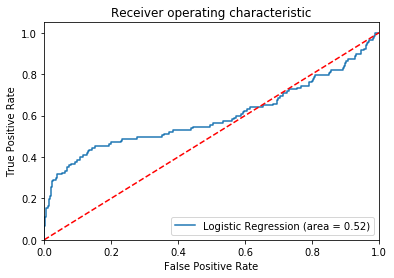

In [152]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_train, logreg.predict_proba(X_train)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

The above ROC course shows that auc = 0.52, which is a very poor prediction. This indicates that this baseline model do not give good prediction on the change rate change. 

Two conclusions:

* Though exchange rate is time series data, which should be correlated. However, the prediction power is very low. 

* To lift the prediction rate, we consider to develop RNN model AND introduce wikileak cable informatino as new feature into the predictive model.   